In [ ]:
#Mounting drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Changing current working directory
%cd "/content/gdrive/MyDrive/Resume Project/01 Production ML Pipeline with Drift Monitoring, Auto-Retraining & Scalable Deployment"

/content/gdrive/MyDrive/Resume Project/01 Production ML Pipeline with Drift Monitoring, Auto-Retraining & Scalable Deployment


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys



In [ ]:
#Loading the dataset
telco_dataset = pd.read_csv("/content/gdrive/MyDrive/Resume Project/01 Production ML Pipeline with Drift Monitoring, Auto-Retraining & Scalable Deployment/dataset/raw/Telco_customer_churn.csv")

In [ ]:
#exploring the top 5 rows of the dataset
telco_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#exploring the bottom 5 rows of the dataset
telco_dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**customerID can be dropped, it is the column that can be used as key to uniquely identify customers.**

In [ ]:
# Shape of dataset
telco_dataset.shape

(7043, 21)

In [ ]:
# Column of dataset
telco_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Describing the dataset
telco_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Information about the dataset
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Checking whether data is balanced or not
print(telco_dataset['Churn'].value_counts())
print("-" * 75)
print(telco_dataset["Churn"].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
---------------------------------------------------------------------------
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


**Data Seems to be like highly imbalanced**

In [ ]:
#Checking for null data points
telco_dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
(telco_dataset == " ").sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
telco_dataset[telco_dataset.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**TotalCharges columns of dataset has 11 nuumber of null values as " ". As number of null values are quite low so we can drop them.**

In [ ]:
# Checking for incorrect datatypes

#Checking for categorical dataset
cat_column= telco_dataset.select_dtypes(include="object").columns

#Checking for numerical dataset
num_column = telco_dataset.select_dtypes(exclude= "object").columns

print(f"categorical columns are as follow : \n {cat_column}")
print( "--" * 75)
print(f"Numerical columns are as follow : \n {num_column}")

categorical columns are as follow : 
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
Numerical columns are as follow : 
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [ ]:
#Changing temporary datatypes of TotalCharges from object to float64
# Temporary conversion for visualization
telco_dataset["TotalCharges_numeric"] = (
    telco_dataset["TotalCharges"]
    .replace(" ", np.nan)
    .astype(float)
)
telco_dataset.select_dtypes(exclude= "object").columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges_numeric'], dtype='object')

**TotalCharges dtype needs to be changes to the float (right now is an object due to presence of null values as " ".)**

**TotalCharges_numeric column should be dropped down because it just a numerical copy of TotalCharges column**

In [ ]:
# Checking for TotalCharges_numeric column
telco_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_numeric
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


# Visualization

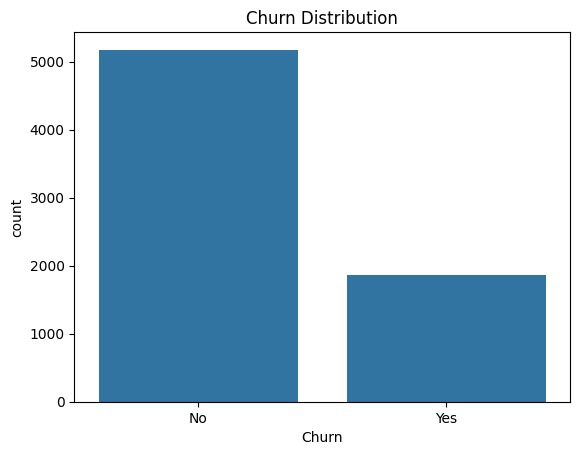

In [ ]:
# 1. Countplot
sns.countplot(x="Churn", data=telco_dataset)
plt.title("Churn Distribution")
plt.show()


**Since churn is a minority class(highly imbalanced), recall and ROC-AUC will be more important than accuracy.**

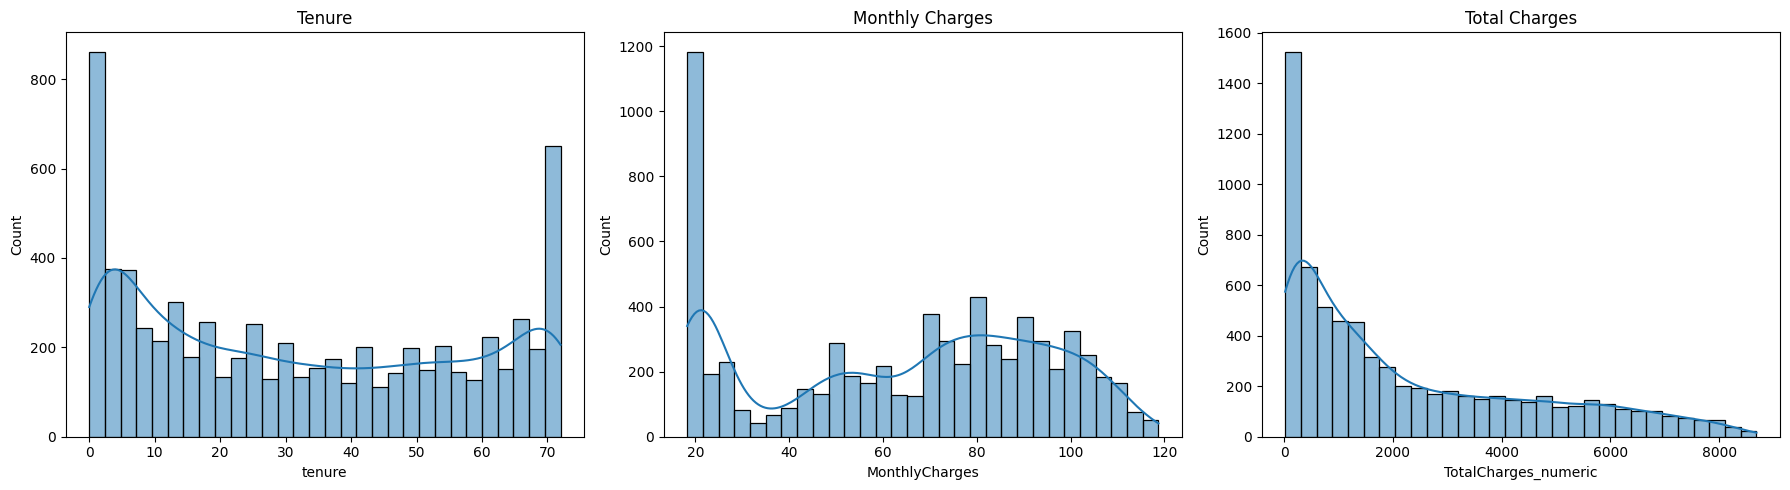

In [ ]:
#Histplot for numerical features
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(telco_dataset['tenure'], bins =30, kde=True)
plt.title("Tenure")

plt.subplot(1, 3, 2)
sns.histplot(telco_dataset['MonthlyCharges'], bins =30, kde=True)
plt.title("Monthly Charges")

plt.subplot(1, 3, 3)
sns.histplot(telco_dataset['TotalCharges_numeric'], bins =30, kde=True)
plt.title("Total Charges")

plt.tight_layout()
plt.show()



<h3>Getting from histogram plot</h3>

1. Count v/s Tenure --> Tenure is right-skewed, indicating many customers churn early in their lifecycle.
2. Count v/s MonthlyCharges --> Monthly charges show wide variability, suggesting pricing tiers that may influence churn behavior.
3. Count v/s TotalCharges --> TotalCharges is heavily right-skewed, with most customers having low cumulative charges and a long tail toward high values, representing long-tenure customers.


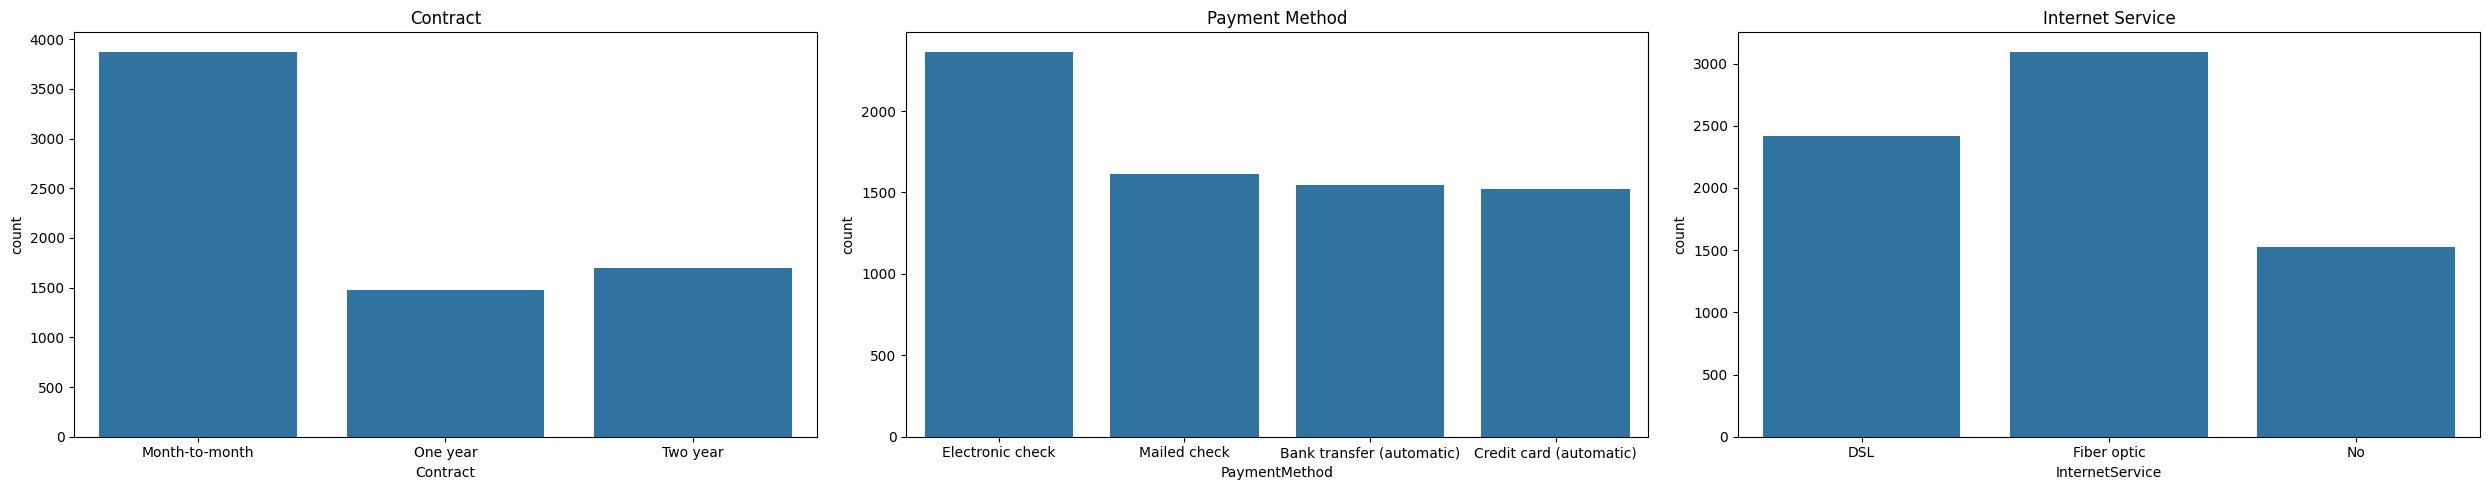

In [ ]:
#Countplot for categorical features
fig, axes =plt.subplots(1, 3, figsize=(25, 5))

sns.countplot(x="Contract", data= telco_dataset, ax = axes[0])
axes[0].set_title("Contract")

sns.countplot(x="PaymentMethod", data= telco_dataset, ax = axes[1])
axes[1].set_title("Payment Method")

sns.countplot(x="InternetService", data= telco_dataset, ax = axes[2])
axes[2].set_title("Internet Service")

plt.tight_layout()
plt.show()


<h3>Getting from Count plot</h3>

1. count v/s Contract --> The dataset is dominated by month-to-month contracts, which may influence churn rates.
2. Count v/s PaymentMethod --> Electronic Check are dominated.
3. Count v/s InternetService --> fiber optics internet service dominates.

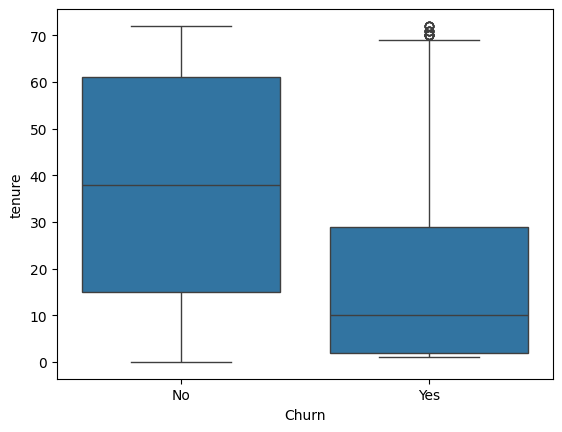

In [ ]:
sns.boxplot(x="Churn", y="tenure", data=telco_dataset)
plt.show()


**Customers with lower tenure are significantly more likely to churn.**

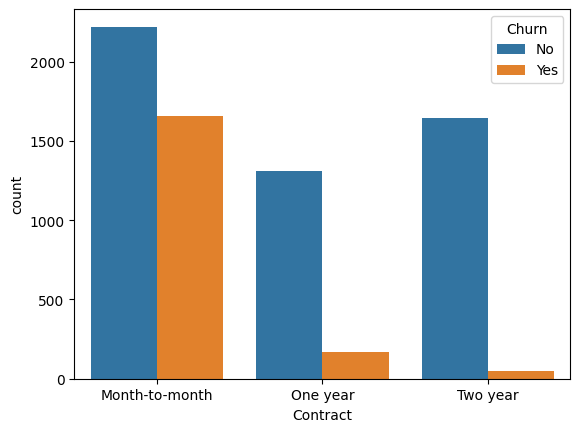

In [ ]:
sns.countplot(x="Contract", hue="Churn", data=telco_dataset)
plt.show()

**Month-to-month customers show significantly higher churn compared to long-term contracts.**

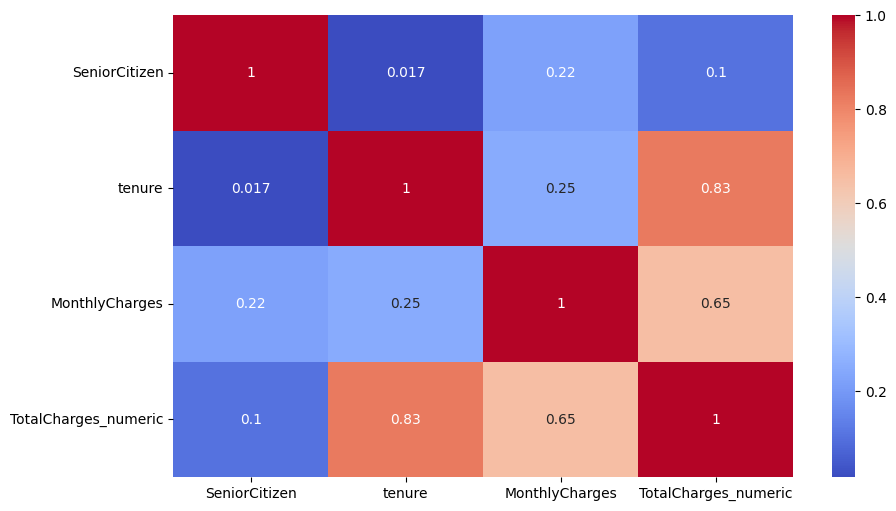

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(telco_dataset.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()


**TotalCharges shows strong correlation with tenure (≈0.83) and moderate correlation with MonthlyCharges (≈0.65), which is expected as TotalCharges is a cumulative feature derived from both.**